#Import data and library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import matplotlib.dates as mates
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential #helps to create model, layer by layer.
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error

In [3]:
# Replace 'your_file_path.csv' with the path to your local CSV file
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
#stock_data = dataset_train.iloc[:, 1:2].values

#Data analytic

In [4]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
training_data = dataset_train.iloc[:, 5:6]
training_data.head()

,Close
0,233.75
1,233.25
2,234.25
3,236.10
4,233.30


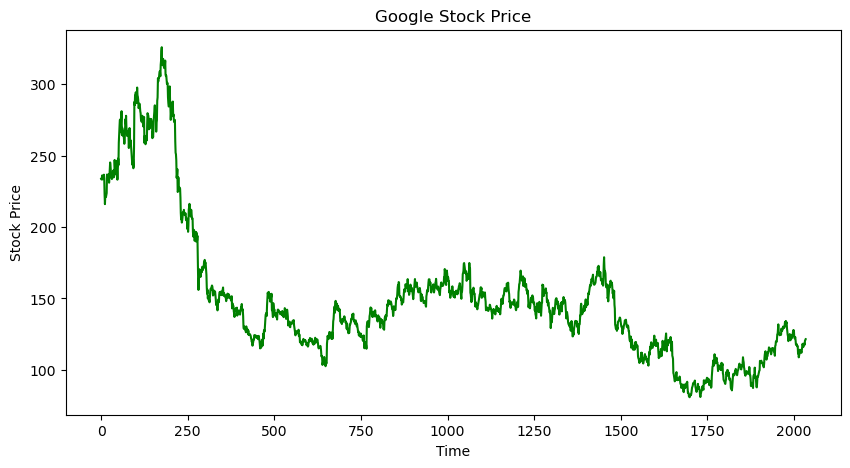

In [6]:
import matplotlib.pylab as plt
plt.figure(figsize=(10,5))
plt.plot(training_data, color ='green');
plt.ylabel('Stock Price')
plt.title('Google Stock Price')
plt.xlabel('Time')
plt.show()

#Min Max Scaler

In [7]:
# Normalize the training data between [0,1]
#the fit method, when applied to the training dataset, learns the model parameters (for example, mean and standard deviation).
#We then need to apply the transform method on the training dataset to get the transformed (scaled) training dataset.
#We could also perform both of this step in one step by applying fit_transform on the training dataset.
mm = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = mm.fit_transform(training_data)
training_data_scaled.shape

(2035, 1)

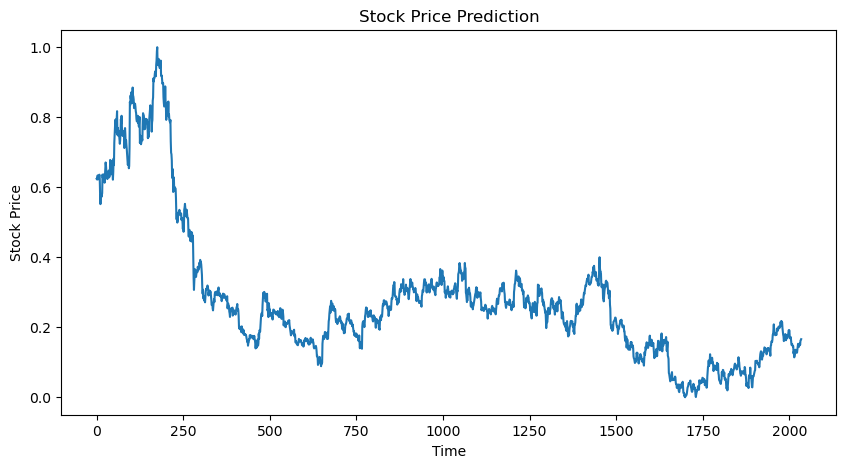

In [8]:
plt.figure(figsize=(10,5))
plt.plot(training_data_scaled)
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

#Prepare data for model training

In [9]:
# Getting the inputs and outputs directly if you know how to consider the past data for the number of time stamps needed for RNN.
x_train = training_data_scaled[59:training_data_scaled.shape[0]-1-365]
y_train = training_data_scaled[60:training_data_scaled.shape[0]-365]
x_test = training_data_scaled[training_data_scaled.shape[0]-1-365:-1]
y_test = training_data_scaled[training_data_scaled.shape[0]-365:]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1610, 1)
(1610, 1)
(365, 1)
(365, 1)


In [10]:
# reshaping
x_train = np.reshape(x_train, (x_train.shape[0],1,1))
print(x_train.shape)

(1610, 1, 1)


#Model Creation

In [11]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [12]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [13]:
# Train the model
regressor.fit(x_train,y_train,epochs = 200, batch_size = 32)

Epoch 1/200

51/51 [==============================] - 7s 6ms/step - loss: 0.0726
Epoch 2/200
51/51 [==============================] - 0s 5ms/step - loss: 0.0240
Epoch 3/200
51/51 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 4/200
51/51 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 5/200
51/51 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 6/200
51/51 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 7/200
51/51 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 8/200
51/51 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 9/200
51/51 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 10/200
51/51 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 11/200
51/51 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 12/200
51/51 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 13/200
51/51 [================

#Prediction and Evaluation

In [14]:
input_value = np.reshape(x_test, (x_test.shape[0], 1, 1))

In [15]:
prediction = regressor.predict(input_value)
prediction = mm.inverse_transform(prediction)
y_test_inverse = mm.inverse_transform(y_test)

12/12 [==============================] - 1s 3ms/step


In [16]:
prediction[:5]

array([[ 98.67541 ],
       [100.487206],
       [ 99.8151  ],
       [ 97.0014  ],
       [ 96.3448  ]], dtype=float32)

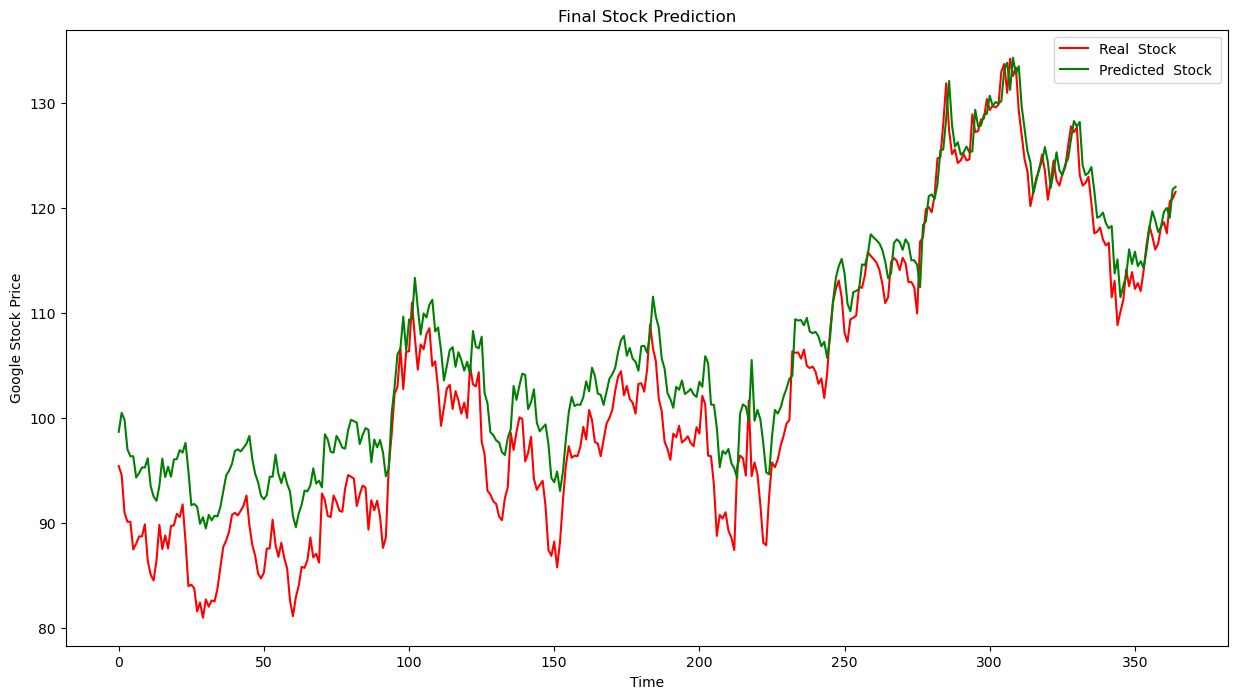

In [17]:
# visualizing the results

plt.rcParams['figure.figsize'] = (15, 8)

plt.plot(y_test_inverse, color = 'red', label = 'Real  Stock ')
plt.plot(prediction, color = 'green', label = 'Predicted  Stock ')
plt.title('Final Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [18]:
rmse = mean_squared_error(y_test_inverse, prediction, squared=False)
print("rmse : ",rmse)

rmse :  4.957092600714989
